<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

# Caos: Primera parte

## Introducción

- Edward Lorenz la definió como:

    **Caos** Cuando el presente determina el futuro, pero el presente aproximado no determina aproximadamente el futuro.

- La **teoría del caos** estudia el comportamiento de los sistemas dinámicos que son muy sensibles a las condiciones iniciales (El famoso _efecto mariposa_ según [Jurassic Park](http://en.wikipedia.org/wiki/Jurassic_Park_%28film%29)). 
        - Aunque no es lo único, ve más adelante.
        
- Este hecho hace que la predicción  a largo plazo sea imposible.

- Entonces la afirmación **determinismo** $\to$ **predictibilidad** es falsa.



Chaos was the law of nature; Order was the dream of man
-- Henry Adams

- Para saber **muchísimo más** recomiendo: [Chaos Book](http://chaosbook.org/)

Durante siglos en física se estuvo trabajando con sistemas como el [oscilador armónico](http://en.wikipedia.org/wiki/Harmonic_oscillator) y el problema de dos cuerpos con fuerza central (también conocido como [_problema de Kepler_](http://en.wikipedia.org/wiki/Kepler_problem)) los cuales se consideraban como paradigmáticos para resolver problemas. La explosión del caos en el siglo XX nos señalaba que esos problemas y métodos no eran la norma, si no al contrario: eran casos especiales.

A lo largo del curso (sobre todo en la última parte) podría quedar el sabor de boca de que las herramientas analíticas son un fraude y que hemos sido engañados durante toda nuestra educación y que el único camino son las simulaciones y la estadística.

Pero eso no es cierto: Existen teorías que tienen el mismo poder predictivo, y el estudio del caso general sigue abriendo el camino para la comprehensión científica del mundo.

Lo que si es cierto, es que, partiendo de la definición de que un **sistema determinístico** es aquel que su estado futuro esta _completamente_ determinado por sus condiciones actuales (en contraste con un sistema estocástico en el cual el futuro está determinado sólo parcialmente) ya no implica **predictibilidad**.

## Sensitividad a condiciones iniciales

Una de las características que puede indicar **caos** es la sensibiliad a condiciones iniciales, la cual se puede expresar matemáticamente como:

$$
|\delta\mathbf{x}(t)| = e^{\lambda t}|\delta\mathbf{x}(0)|
$$

a $\lambda$ se le conoce como _exponente de Lyapunov_. Si este exponente positivo indica que con el paso del tiempo la diferencia $\delta$ crece exponencialmente.

<div class="alert alert-danger">
    
**NOTA** La sensibilidad es una idea muy importante pero no determina completamente si el sistema es caotico o no, para ello se necesita otra característica: _mezcla topológica_ (topological mixing), la cual verémos más adelante, pero se puede entender como que las trayectorias del sistema, luego de diverger se vueven a aproximar un número infinito de veces.
</div>

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [136]:
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [4]:
from sympy import *
x= Symbol("x")
r=Symbol("r")
f=Function("f")
puntofijo=Eq(x,1-1/r)
puntofijo


Eq(x, 1 - 1/r)

In [5]:
puntofijo.rhs.subs(r,2)

1/2

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [6]:
Derivative?

In [21]:
derfx=Eq(diff(f(x)),Derivative((r*x*(1-x)),x,evaluate=True))
derfx

Eq(Derivative(f(x), x), -r*x + r*(1 - x))

In [32]:
simplify?

In [41]:
puntoBif1=Eq(derfx.rhs.subs(x,puntofijo.rhs),1)
puntoBif1.simplify()

Eq(r, 1)

In [45]:
puntoBif2=Eq(derfx.rhs.subs(x,puntofijo.rhs),-1)
puntoBif2.simplify()

Eq(r, 3)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [57]:
def iterar(g, x0, N, r):
    if N==0:
        return x0
    if N>1:
        return g(iterar(g,x0,N-1,r), r)
    else:
        return g(x0,r)

In [58]:
x = iterar(logistic_map,0.35,100,2.8)
x

0.6428571428586157

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [59]:
def iterarLista(g, x0, N, mu):
    return [iterar(g,x0,i,mu) for i in range(N)]

In [60]:
iterarLista(logistic_map,1/4,100,3)

[0.25,
 0.5625,
 0.73828125,
 0.5796661376953125,
 0.7309599195141345,
 0.5899725467340735,
 0.7257148225025549,
 0.5971584567079203,
 0.7216807028704055,
 0.6025729979246489,
 0.7184363402902498,
 0.6068566957218066,
 0.7157449397382518,
 0.6103623629320143,
 0.713460446544187,
 0.6133039132834688,
 0.7114866697039566,
 0.6158201656125887,
 0.7097570677124175,
 0.6180059176340649,
 0.7082238102100269,
 0.6199285345848561,
 0.706851439776987,
 0.6216374455865626,
 0.7056129954935281,
 0.6231698882525353,
 0.7044875358835738,
 0.6245545430047923,
 0.7034584974506021,
 0.6258139194454301,
 0.7025125730213365,
 0.6269659733048335,
 0.701638924868269,
 0.6280252319339057,
 0.7008286199648089,
 0.6290035962090911,
 0.7000742164953654,
 0.629910923681297,
 0.6993694557248167,
 0.630755460371971,
 0.6987090287487417,
 0.6315441656811952,
 0.6980883974257147,
 0.6322829604159362,
 0.6975036551507876,
 0.6329769186062363,
 0.6969514173539713,
 0.6336304176067855,
 0.6964287344707083,
 0.6342472

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [93]:
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt


In [132]:
interact(iterarLista,g=fixed(logistic_map),x0=(0,1,0.1),N=fixed(100),mu=(0,4,0.1))

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0), FloatSlider(value=2.0, description='m…

<function __main__.iterarLista(g, x0, N, mu)>

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=3.0, description='m…

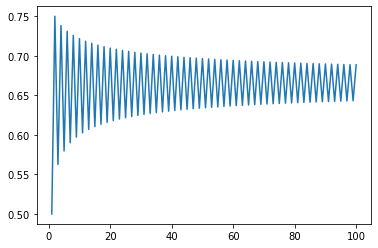

In [141]:
fig,ax=plt.subplots(figsize=(6,4))

xi=[i for i in range (1,101)]
@widgets.interact(x0=(0,1,0.1),mu=(0,4,0.2))
def actualizacion(x0=0.5,mu=3):
    [l.remove() for l in ax.lines]
    ax.plot(xi, iterarLista(g=logistic_map,x0=x0,N=100,mu=mu))

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

In [143]:
a=iterarLista(logistic_map,0.35,100,2.8)
b=iterarLista(logistic_map,0.35,100,3.1)

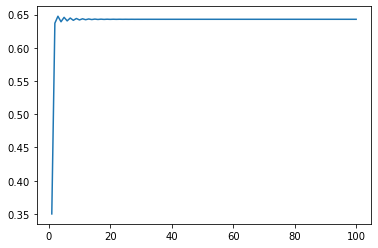

In [145]:
plt.plot(xi,a)

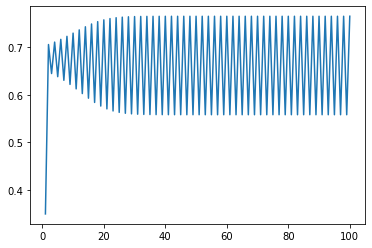

In [147]:
plt.plot(xi,b)

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [72]:
iterarLista(logistic_map,1/4,10,0.8)

[0.25,
 0.15000000000000002,
 0.10200000000000002,
 0.07327680000000002,
 0.054325848465408014,
 0.041099640523137235,
 0.03152836805760491,
 0.024427464052183285,
 0.01906461044173006,
 0.014960920856348113]

In [79]:
iterarLista(logistic_map,1/4,10,1.2)

[0.25,
 0.22499999999999998,
 0.20924999999999996,
 0.19855732499999995,
 0.1909587764266132,
 0.18539222655871673,
 0.1812263386683818,
 0.17806002340948177,
 0.17562558176747586,
 0.1737374841555738]

In [78]:
iterarLista(logistic_map,1/4,10,2.8)

[0.25,
 0.5249999999999999,
 0.69825,
 0.589951425,
 0.6773444751933142,
 0.6119370239315423,
 0.6649162874853781,
 0.6238473307417123,
 0.6570531482708282,
 0.6309360641310195]

In [80]:
iterarLista(logistic_map,1/4,10,3.2)

[0.25,
 0.6000000000000001,
 0.768,
 0.5701632,
 0.7842468011704321,
 0.5414520192780059,
 0.7945015363128827,
 0.522460304349926,
 0.7983857111312278,
 0.5150910956566768]

## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [99]:
import numpy as np


In [152]:
def CobWeb(r):
    plt.figure(2)
    x=np.linspace(0,1,num=100)
    plt.plot(x,r*x*(1-x))
    plt.plot(x,x)
    plt.show()

interactive_plot = interactive(CobWeb,r=(0,4,0.1))
interactive_plot

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0), Output()), _dom_classes=('widget-inter…

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [25]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

<img src="./bifurcacion.png"/>

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

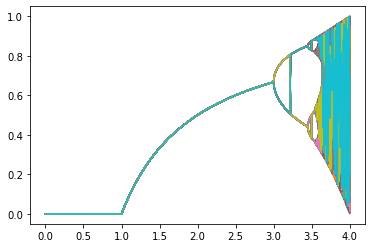

In [227]:
import sympy
rw=np.linspace(0,4,1000)
xw=1e-5*np.ones(1000)
for i in range(1000):
    xw=logistic_map(xw,rw)
    if i>=(900):
        plt.plot(rw,xw)

<div class="alert alert-info">
    
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [216]:
def mapeo2(x,mu):
    return 1-mu*x**2

In [162]:
x=Symbol("x")
mu=Symbol("mu")

In [180]:
solve(Eq(x,1-mu*x**2),x)

[(sqrt(4*mu + 1) - 1)/(2*mu), -(sqrt(4*mu + 1) + 1)/(2*mu)]

In [197]:
puntofijo2=(sympy.sqrt(4*mu +1)-1)/(2*mu)
puntofijo2

(sqrt(4*mu + 1) - 1)/(2*mu)

In [171]:
derfux=Eq(Derivative(f(x,mu),x),Derivative((1-mu*x**2),x,evaluate=True))
derfux

Eq(Derivative(f(x, mu), x), -2*mu*x)

In [199]:
abs(derfux.rhs.subs(x,((sympy.sqrt(4*mu +1)-1)/(2*mu))))

Abs(sqrt(4*mu + 1) - 1)

In [209]:
puntobif1=Eq(derfux.rhs.subs(x,puntofijo2),1)
solve(puntobif1,mu)

[-1/4]

In [207]:
puntobif2=Eq(derfux.rhs.subs(x,puntofijo2),-1)
solve(puntobif2,mu)

[3/4]

In [224]:
def CobWebnueva(mu):
    plt.figure(4)
    x=np.linspace(-1,1,num=100)
    plt.plot(x,1-mu*x**2)
    plt.plot(x,x+1)
    plt.show()
interactive_plot = interactive(CobWebnueva,mu=(-4,4))
interactive_plot

interactive(children=(IntSlider(value=0, description='mu', max=4, min=-4), Output()), _dom_classes=('widget-in…

/tmp/ipykernel_62/1393676409.py:2: RuntimeWarning: overflow encountered in square
  return 1-mu*x**2
/tmp/ipykernel_62/1393676409.py:2: RuntimeWarning: overflow encountered in multiply
  return 1-mu*x**2


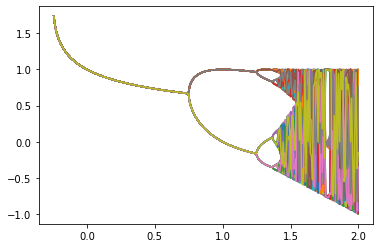

In [225]:
muq=np.linspace(-4,4,1000)
xq= 1e-5*np.ones(1000)
for i in range(1000):
    xq=mapeo2(xq,muq)
    if i>(900):
        plt.plot(muq,xq)